# SIS 1

# Some theoretical questions

## Exercise: Comparing MSE and RMSE

Given the following set of true values and predicted values from a regression model:

**True values :**  

$y_i$ = [500, 300, 800, 400, 6000]

**Predicted values :** 

$\hat{y_i}$ = [450, 350, 780, 420, 910]

1. Calculate on paper the **Mean Squared Error (MSE)** for this set of true and predicted values. 

   The formula for MSE is:  
   MSE = $\frac{1}{n} \Sigma_{i=1}^n({y_i}-\hat{y_i})^2$, where n is the number of data points.

2. What does the result quantify ? Explain with your own words.

3. What are the disadvantages of this metric ?

4. Calculate the **Root Mean Squared Error (RMSE)** for the same values.

   The formula for RMSE is:

   RMSE = $\sqrt{\frac{1}{n} \Sigma_{i=1}^n({y_i}-\hat{y_i})^2} = \sqrt{MSE}$

5. Interprete the results.

6. What is the difference with MSE ? How does it make it "better" ? In your opinion, why is the RMSE generally preferred in some situations over MSE ?

## Exercise: Bias Variance decomposition of MSE 

Given a model $\hat{f}(X)$ that predicts a value based on some input data, and the true value $Y$, prove that the **Mean Squared Error (MSE)** can be decomposed into two components: **Bias** and **Variance**, i.e. $\text{MSE} = \mathbb{E}[(\hat{Y} - Y)^2] = (\text{Bias}(\hat{Y}))^2 + \text{Var}(\hat{Y}) $

Where:
- **Bias** is the difference between the expected prediction and the true value, i.e., $\text{Bias} = \mathbb{E}[\hat{Y}] - Y$.
- **Variance** is the expected squared deviation of the predicted value from the expected predicted value, i.e., $\text{Variance} = \mathbb{E}[(\hat{Y} - \mathbb{E}[\hat{Y}])^2]$.


Hints:
- Use the identity : $(\hat{Y} - Y) = (\hat{Y} - \mathbb{E}[\hat{Y}]) + (\mathbb{E}[\hat{Y}] - Y) = (\hat{Y} - \mathbb{E}[\hat{Y}]) + \text{Bias}(\hat{Y})$
- Start by expanding the expression $(\hat{Y} - Y)^2$ to isolate the terms involving $\hat{Y}$ and $Y$.

# Coding exercise

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # you can also use seaborn if you prefer

from sklearn.ensemble import GradientBoostingRegressor

# Import the other necessary library here
from sklearn.preprocessing  import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

import seaborn as sns

from sklearn.metrics import mean_squared_error

In [2]:
# import the dataset
df = pd.read_csv("cars.csv")
df = df.fillna(value=float(0)) # replace NaN by float(0) (don't do this automatically in future projects, it can be source of under or overfitting. It should be done precociously)

### 1. Analyse your dataset. How many features and columns do we have ?

In [4]:
# the number of columns (features): 
df.shape[1] 

12

### 2. What categorical variables are ordinal or nominal ? Encode them using OHE and Label encoder from SKLearn. 

ordinal (can be ordered): owner (first, second, third)

nominal: fuel (diesel, pertrol, LPG, CNG), seller_type (dealer, individual, trustmark dealer), transmission (manual, automatic)

In [4]:
# OHE encoder for nominal variables: 
# fuel (diesel, pertrol, LPG, CNG), 
# seller_type (dealer, individual, trustmark dealer), 
# transmission (manual, automatic)

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

ohetransform = ohe.fit_transform(df[['fuel', 'seller_type', 'transmission']])

ohetransform  = ohetransform.astype(int)

ohetransform 

,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,0,1,0,0,0,1,0,0,1
1,0,1,0,0,0,1,0,0,1
2,0,0,0,1,0,1,0,0,1
3,0,1,0,0,0,1,0,0,1
4,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
8123,0,0,0,1,0,1,0,0,1
8124,0,1,0,0,0,1,0,0,1
8125,0,1,0,0,0,1,0,0,1
8126,0,1,0,0,0,1,0,0,1


In [5]:
# Label encoder for ordinal variables - owner

encoder = LabelEncoder()

df['owner'] = encoder.fit_transform(df['owner'])

df.head(5)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,0,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,4,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,0,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,0,16.10,1298.0,88.20,5.0


### 3. Plot the distributions of Year, km_driven and mileage data. What could be a problem for convergence ?


In [ ]:
# import the dataset
df = pd.read_csv("cars.csv")
df = df.fillna(value=float(0)) # replace NaN by float(0) (don't do this automatically in future projects, it can be source of under or overfitting. It should be done precociously)

<Axes: xlabel='year', ylabel='Count'>

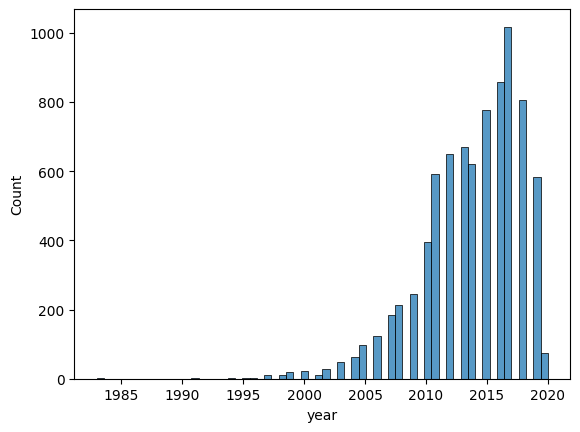

In [73]:
# plotting year

sns.histplot(df['year'])

<Axes: ylabel='Count'>

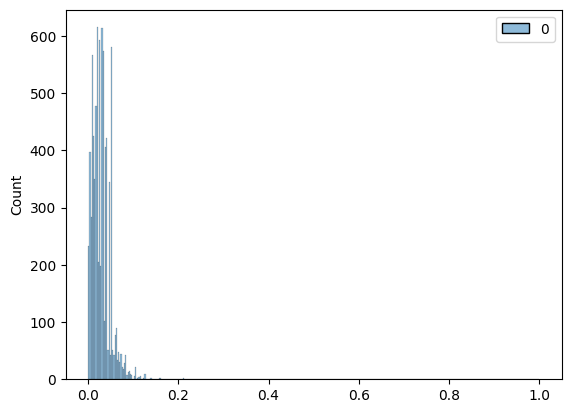

In [9]:
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df[['km_driven']])

sns.histplot(x_scaled)

<Axes: xlabel='mileage', ylabel='Count'>

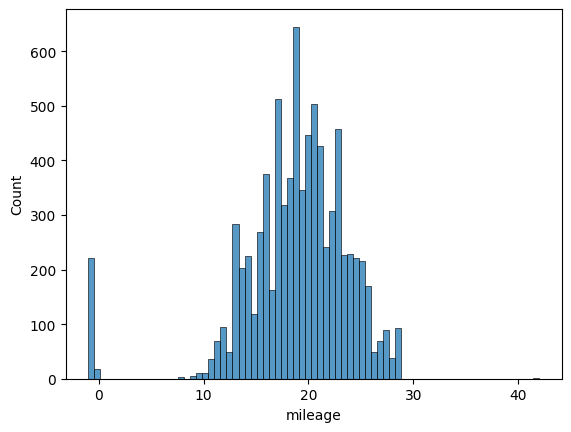

In [78]:
sns.histplot(df['mileage'])

### 4. Scale those three numerical features, use whatever scaler you want

In [6]:
scaler = StandardScaler()

df['year'] = scaler.fit_transform(df['year'].values.reshape(-1, 1))

df['year'].describe()

count    8.128000e+03
mean    -4.862252e-15
std      1.000062e+00
min     -7.617213e+00
25%     -6.933756e-01
50%      2.957441e-01
75%      7.903040e-01
max      1.532144e+00
Name: year, dtype: float64

In [7]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,0.048464,450000,145500,Diesel,Individual,Manual,0,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,0.048464,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,-1.929775,158000,140000,Petrol,Individual,Manual,4,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,-0.940656,225000,127000,Diesel,Individual,Manual,0,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,-1.682495,130000,120000,Petrol,Individual,Manual,0,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,-0.198816,320000,110000,Petrol,Individual,Manual,0,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,-1.682495,135000,119000,Diesel,Individual,Manual,1,16.80,1493.0,110.00,5.0
8125,Maruti Swift Dzire ZDi,-1.187935,382000,120000,Diesel,Individual,Manual,0,19.30,1248.0,73.90,5.0
8126,Tata Indigo CR4,-0.198816,290000,25000,Diesel,Individual,Manual,0,23.57,1396.0,70.00,5.0


In [8]:
scaler = StandardScaler()

df['mileage'] = scaler.fit_transform(df['mileage'].values.reshape(-1, 1))

df['mileage'].describe()


count    8.128000e+03
mean     5.507406e-16
std      1.000062e+00
min     -3.833895e+00
25%     -4.937388e-01
50%      5.769527e-02
75%      6.327212e-01
max      4.491397e+00
Name: mileage, dtype: float64

In [9]:
min_max_scaler = MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(df[['km_driven']])
df['km_driven'] = x_scaled 
df['km_driven'].describe()


count    8128.000000
mean        0.029578
std         0.023957
min         0.000000
25%         0.014827
50%         0.025418
75%         0.041517
max         1.000000
Name: km_driven, dtype: float64

### 5. Select Features and Target Variable
Separate X's to y

In [10]:
X = df[['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']]
y = df['selling_price']

### 6. Plot the distribution of the Target variable 

<Axes: xlabel='selling_price', ylabel='Count'>

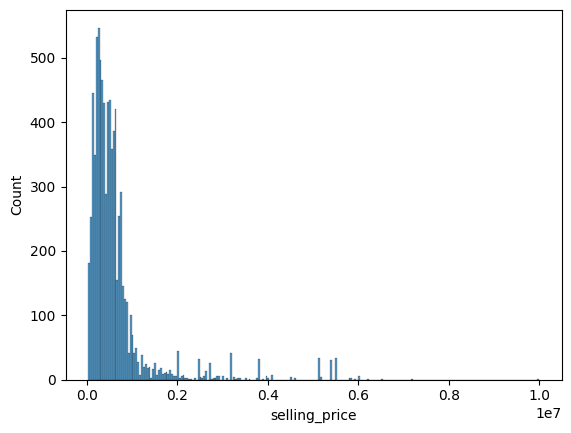

In [160]:
sns.histplot(df['selling_price'])
# sns.kdeplot(y, fill=True, color='red')

### 7. Split the Data
Split the dataset into training and testing sets. You should then have four dataset, X_train, X_test, y_train and y_test

In [40]:

X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=104,test_size=0.25, shuffle=True)


In [150]:
X.shape[0] * 0.75 == X_train.shape[0]

True

In [152]:
X.shape[0] * 0.25 == X_test.shape[0]

True

In [154]:
y.shape[0] * 0.75 == y_train.shape[0]

True

In [155]:
y.shape[0] * 0.25 == y_test.shape[0]

True

### 8. Train a Gradient Boosting Model

The following code trains an ensemble Model. The class ```GradientBoostingRegressor(*params)```  setup the model and the function ```fit(X_train, y_train)``` trains and fits it.
- Use the function ```Predict()``` to predict y, both with your train and test datasets. (have a look at SKlearn documentation to use it)
- Compute the train and test Mean Squared Errors.


In [91]:
# import the dataset
df = pd.read_csv("cars.csv")
df = df.fillna(value=float(0)) # replace NaN by float(0) (don't do this automatically in future projects, it can be source of under or overfitting. It should be done precociously)

In [92]:
# dropping column 'name' for convenience

df.drop('name', axis=1, inplace=True)

In [93]:
# preparing data (categorical values -> numeric values using OHE)

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

ohetransform = ohe.fit_transform(df[['fuel', 'seller_type', 'transmission', 'owner']])
ohetransform  = ohetransform.astype(int)

df = pd.concat([df, ohetransform], axis=1)

# dropping original columns (dummy)
df = df.drop(['fuel', 'seller_type', 'transmission', 'owner'], axis=1)


In [94]:
# our new columns
df.columns

Index(['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power',
       'seats', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')

In [ ]:
# splitting data after encoding into test and train

X = df[['year', 'km_driven', 'mileage', 'engine', 'max_power',
       'seats', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner']]

X=df.drop()

y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=42,test_size=0.25, shuffle=True)

In [96]:
n = 10 # number of estimators (relative to model complexity)

gbr = GradientBoostingRegressor(n_estimators=n, random_state=42, learning_rate=0.9) # dont change those parameters
gbr.fit(X_train, y_train)

# YOUR CODE GOES HERE
# predict() with train dataset
y_predicted_train = gbr.predict(X_train)


In [97]:
# predict() with test dataset
y_predicted_test = gbr.predict(X_test)

In [98]:
# MSE for training data
mse_train = mean_squared_error(y_train, y_predicted_train)
mse_train

28650557177.1007

In [99]:
# MSE for testing data
mse_test = mean_squared_error(y_test, y_predicted_test)

mse_test

36094769482.68445

### Task 6: Increase the model complexity

Train your model in a loop that increase the parameter ```n```. Start at n = 10 to n = 5000 and step = 500 (otherwise your code will run for hours).

At each iterations : 
- reset the model
- train the model
- predict values using X_train
- compute the MSE of training and testing sets.
- store the new mse in a list

In [142]:
# RESETTING THE MODEL

# import the dataset
df = pd.read_csv("cars.csv")
df = df.fillna(value=float(0)) # replace NaN by float(0) (don't do this automatically in future projects, it can be source of under or overfitting. It should be done precociously)


# dropping column 'name' for convenience

df.drop('name', axis=1, inplace=True)

# preparing data (categorical values -> numeric values using OHE)

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

ohetransform = ohe.fit_transform(df[['fuel', 'seller_type', 'transmission', 'owner']])
ohetransform  = ohetransform.astype(int)

df = pd.concat([df, ohetransform], axis=1)

df = df.drop(['fuel', 'seller_type', 'transmission', 'owner'], axis=1)


# splitting data after encoding into test ans train

X = df[['year', 'km_driven', 'mileage', 'engine', 'max_power',
       'seats', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner']]
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=42,test_size=0.25, shuffle=True)


In [143]:
# creating mse_train_list list
mse_train_list = []


# creating mse_train_list list
mse_test_list = []

In [144]:
for i in range(1, 201, 5):
    gbr = GradientBoostingRegressor(n_estimators=i, random_state=42, learning_rate=0.9) 
    gbr.fit(X_train, y_train)


    y_predicted_train = gbr.predict(X_train)

    y_predicted_test = gbr.predict(X_test)

    mse_train = mean_squared_error(y_train, y_predicted_train)
    mse_train_list.append(mse_train)

    mse_test = mean_squared_error(y_test, y_predicted_test)
    mse_test_list.append(mse_test)

In [145]:
mse_train_list

[109710452990.57033,
 34256474388.018654,
 27558715814.624878,
 22297788904.93416,
 18497277822.654324,
 16275376157.903854,
 14375956275.225616,
 13159856288.87438,
 12207596233.967928,
 11544103161.902155,
 10850154144.054405,
 10344540664.224043,
 9805227594.990154,
 9480924478.275652,
 9092570365.880693,
 8832064117.3541,
 8647569147.61104,
 8207827118.410308,
 7979161910.813812,
 7743349969.195778,
 7567594678.161171,
 7392145046.542787,
 7159948604.639436,
 6912293544.484711,
 6733508086.843795,
 6580132715.807207,
 6439495112.071253,
 6273217903.181935,
 6088986396.034027,
 5768606535.76565,
 5617529535.458087,
 5466707297.0155,
 5322413463.656597,
 5248208437.572563,
 5179504072.606663,
 5095423432.818733,
 5043243459.8449545,
 4943833496.690288,
 4865869353.958978,
 4786797727.885988]

In [146]:
mse_test_list 

[99961776111.98567,
 45918324080.2972,
 37525231962.4536,
 35444434395.341896,
 33145472534.4616,
 30033371547.84627,
 29630930917.69588,
 30243337108.456783,
 30552611844.654152,
 29796178487.367634,
 29690344475.520897,
 28992958968.17708,
 28221965571.881687,
 28115212842.653996,
 27764688938.100357,
 28123647474.94694,
 27439873639.57658,
 28232877167.297474,
 28385290263.847294,
 28137469572.428387,
 28501943224.74315,
 28407789265.23192,
 28139577322.33869,
 28803009459.817543,
 28945467345.92621,
 29228394999.34758,
 29126018271.499588,
 29035788091.370735,
 28367939028.08765,
 28323838725.07378,
 28444149602.082474,
 28153537925.55972,
 28208838330.38049,
 28133389021.978855,
 28146947905.91915,
 28237014438.42402,
 28266281204.907864,
 28735293898.50365,
 28715582732.65958,
 28532129417.551334]

### Task 7 : In one figure, plot both train and test MSE evolution, with respect to the model complexity (i.e. n) 

In [147]:
model_compl = list(range(1, 201, 5))
df_trained = pd.DataFrame(zip(model_compl, mse_train_list, mse_test_list ), columns=['model_compl','mse_train','mse_test'])
df_trained

,model_compl,mse_train,mse_test
0,1,1.097105e+11,9.996178e+10
1,6,3.425647e+10,4.591832e+10
2,11,2.755872e+10,3.752523e+10
3,16,2.229779e+10,3.544443e+10
4,21,1.849728e+10,3.314547e+10
5,26,1.627538e+10,3.003337e+10
6,31,1.437596e+10,2.963093e+10
7,36,1.315986e+10,3.024334e+10
8,41,1.220760e+10,3.055261e+10
9,46,1.154410e+10,2.979618e+10


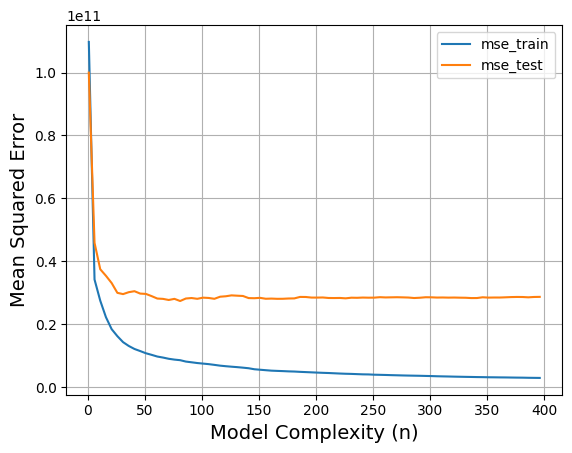

In [141]:
sns.lineplot(data=df_trained, x='model_compl', y='mse_train', label='mse_train')
sns.lineplot(data=df_trained, x='model_compl', y='mse_test', label='mse_test')

plt.xlabel('Model Complexity (n)', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)

plt.grid(True)


### Task 8 : What can you observe ?

The mse_train is decreasing, model is fitting the training data well.

At initial values if model complexity(n) the mse_test fluctuates (starts probable overfitting). As model complexity increases, the mse_test does not seem to decrease.

### Task 9 (Bonus) : In your opinion, what could we change in the code to improve our model fit ? 

Add normalization of features (min-max scaling or standardization). I think it would help to improve feature balance and treat all features equally.